<center><h1 style="background:#87CEFA">EDA on Heart Attack Dataset + Testing ✔</h1></center>
<br>

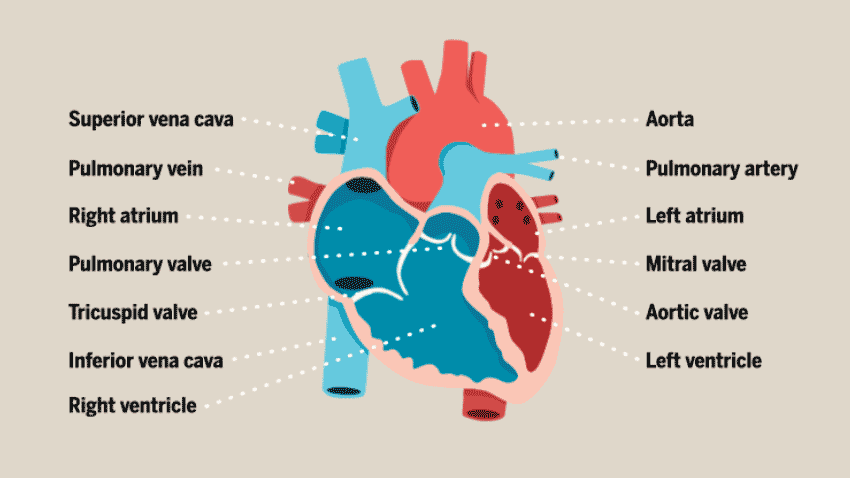 

<center>In this notebook, I have performed in-depth Exploratory Data Analysis and some very basic  Hypothesis Testing. </center>
<center style="color:green"> If you found this notebook helpful, consider upvoting and leaving comments with suggestions. </center>

## Index


* [1. Introduction and Imports](#Introduction-and-Imports)
* [2. Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * [2.1 Gender](#Gender)
    * [2.2 Age](#Age)
    * [2.3 Exercise Induced Angina](#Exericse-Induced-Angina)
    * [2.4 Resting Electrocardiographic Results](#Resting-Electrocardiographic-Results)
    * [2.5 Chest Pain Type](#Chest-Pain-Type)
    * [2.6 Cholestrol Distribution](#Cholestrol-Distribution)
    * [2.7 Fasting Blood Sugar](#Fasting-Blood-Sugar)
    * [2.8 Maximum Heart Rate Achieved](#Maximum-Heart-Rate-Achieved)
    * [2.9 Target Variable Count](#Target-Variable-Count)
* [3. In-depth Exploratory Data Analysis](#In-depth-Exploratory-Data-Analysis)
    * [3.1 Gender VS Resting Blood Pressure](#Gender-VS-Resting-Blood-Pressure)
    * [3.2 Gender vs Cholestrol](#Gender-vs-Cholestrol)
    * [3.3 Chest Pain Type VS Gender](#Chest-Pain-Type-VS-Gender)
    * [3.4 Chest Pain Type vs Resting Blood Pressure](#Chest-Pain-Type-vs-Resting-Blood-Pressure)
    * [3.5 Chest Pain Vs Cholestrol](#Chest-Pain-Vs-Cholestrol)
    * [3.6 Chances of getting Heartattack vs Maximum Blood Pressure](#Chances-of-getting-Heartattack-vs-Maximum-Blood-Pressure)
    * [3.7 Chances of getting Heartattack vs Cholestrol](#Chances-of-getting-Heartattack-vs-Cholestrol)
    * [3.8 Heat Map](#Heat-Map)
* [4. Testing](#Hypothesis-Testing)
    * [4.1 Shapiro Wilk Test](#Shapiro-Wilk-Test)
    * [4.2 D’Agostino’s K^2 Test](#D’Agostino’s-K^2-Test)

## Introduction and Imports 📃


In [33]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import warnings
from scipy.stats import *


In [34]:
# Importing dataset
df=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [35]:
# viewing top rows of data
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
# viewing summary of the dataset
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [37]:
# viewing the dteails about rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### It shows the dataset contains 303 rows and 14 columns with their data type.

In [38]:
# fix any missing value or incorrect value
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### From this we can say there are no missing values in the dataset

## Exploratory Data Analysis 📊📈


### Gender
Here 0 represents female and 1 represents male.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


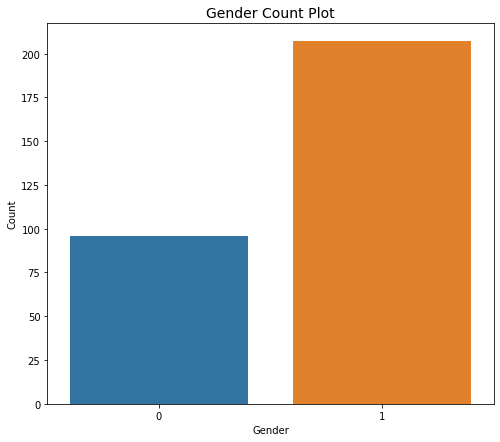

In [39]:
plt.figure(figsize=(8, 7))
sns.countplot(df['sex'])
plt.title("Gender Count Plot", fontdict={'fontsize': 14})
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

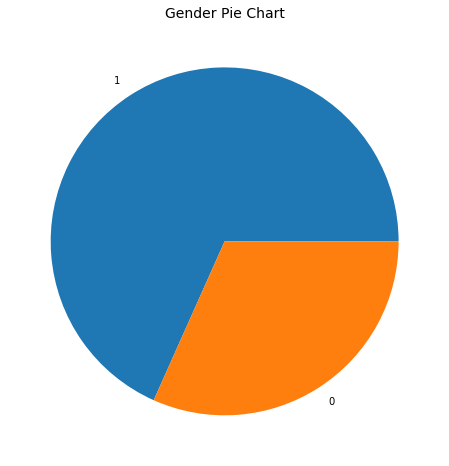

In [40]:
labels = df['sex'].value_counts().index.tolist()
values = df['sex'].value_counts().tolist()
plt.figure(figsize=(8, 8))
plt.pie(x=values, labels=labels, )
plt.title("Gender Pie Chart", fontdict={'fontsize': 14})
plt.show()

### Age

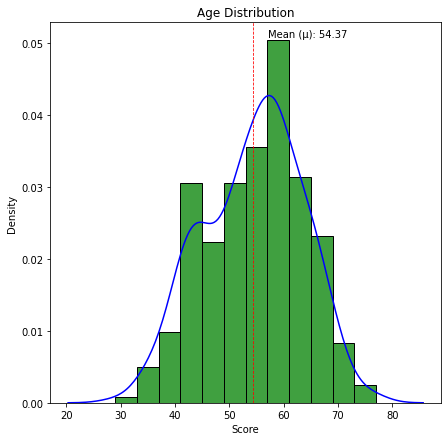

In [41]:
plt.figure(figsize=(7, 7))
plt.title(f"Age Distribution")
sns.histplot(df['age'], stat='density', color='green')
sns.kdeplot(df['age'], color='blue')
plt.axvline(df['age'].mean(), color='red', linestyle='--', linewidth=0.8)
min_ylim, max_ylim = plt.ylim()
plt.text(df['age'].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df['age'].mean()))
plt.xlabel("Score")
plt.ylabel("Density")
plt.show()

In [42]:
def print_quantile_summary(column:str):
    """
    Prints Quantile Summary a bit nicely.
    """
    verbose = column.split(' ')[0].capitalize()
    print(f"Some Stats about {verbose} :", end=" ")

    print(f"Maximum {verbose} is: ", end="")
    print(f"{df[column].max()}", end="\n")

    print(f"Minimum {verbose} is: ", end="")
    print(f"{df[column].min()}", end="\n\n")

    print(f"25% of people were less than ", end="")
    print(f"{int(np.quantile(df[column], 0.25))}", end=" ")
    print(f"{verbose}")

    print(f"50% of people were less than ", end="")
    print(f"{int(np.quantile(df[column], 0.50))}", end=" ")
    print(f"{verbose}")

    print(f"75% of people were less than ", end="")
    print(f"{int(np.quantile(df[column], 0.75))}", end=" ")
    print(f"{verbose}")

In [43]:
print_quantile_summary("age")

Some Stats about Age : Maximum Age is: 77
Minimum Age is: 29

25% of people were less than 47 Age
50% of people were less than 55 Age
75% of people were less than 61 Age


### Exercise Induced Angina
Angina is a type of chest pain caused by reduced blood flow to the heart. Angina is a symptom of coronary artery disease.
Angina, also called angina pectoris, is often described as squeezing, pressure, heaviness, tightness or pain in your chest. Some people with angina symptoms say angina feels like a vise squeezing their chest or a heavy weight lying on their chest. Angina may be a new pain that needs to be checked by a doctor, or recurring pain that goes away with treatment.<br/>
Here, 1 means yes and 0 means no __Angina__

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


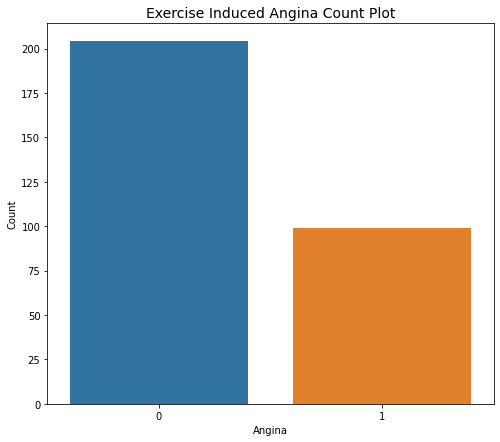

In [44]:
plt.figure(figsize=(8, 7))
sns.countplot(df['exng'])
plt.title("Exercise Induced Angina Count Plot", fontdict={'fontsize': 14})
plt.xlabel("Angina")
plt.ylabel("Count")
plt.show()

#### Here in the given dataset people having no Angina are more in number.

### Resting Electrocardiographic Results
The electrocardiogram (ECG) is one of the simplest and oldest cardiac investigations available, yet it can provide a wealth of useful information and remains an essential part of the assessment of cardiac patients.
Here in the dataset, 0 represents the person has normal ECG range and 1 represents out of normal ECG range.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


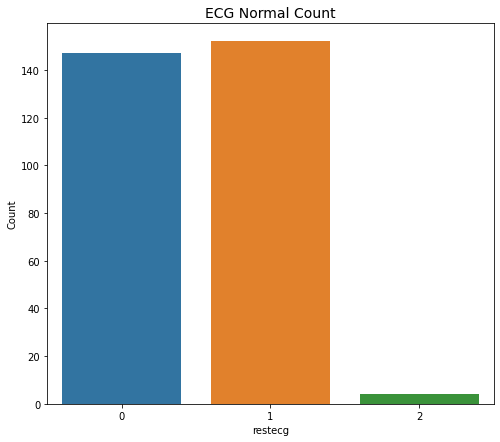

In [45]:
plt.figure(figsize=(8, 7))
sns.countplot(df['restecg'])
plt.title("ECG Normal Count", fontdict={'fontsize': 14})
plt.xlabel("restecg")
plt.ylabel("Count")
plt.show()

#### Here, the number of people having abnormal ecg rate is more in number

### Chest Pain Type
- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

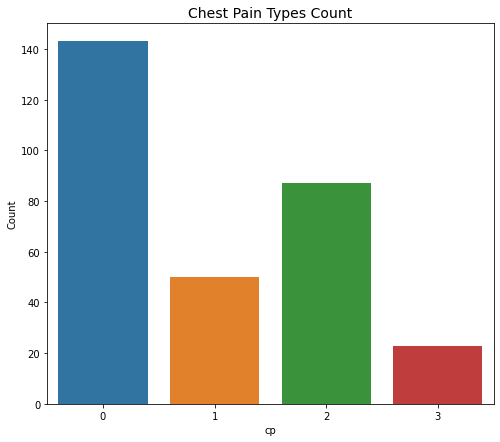

In [46]:
plt.figure(figsize=(8, 7))
sns.countplot(df['cp'])
plt.title("Chest Pain Types Count", fontdict={'fontsize': 14})
plt.xlabel("cp")
plt.ylabel("Count")

#### Here the people having type 0 chest pain is high in number.

### Cholestrol Distribution
Cholestoral in mg/dl fetched via BMI sensor.

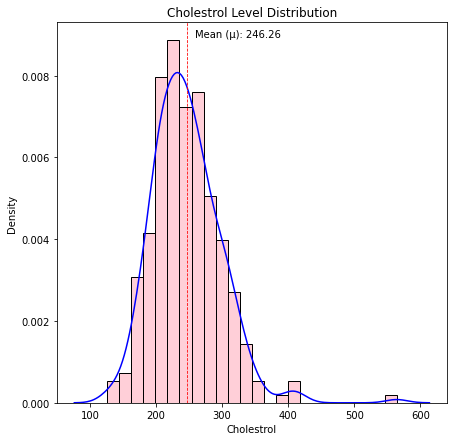

In [47]:
plt.figure(figsize=(7, 7))
plt.title(f"Cholestrol Level Distribution")
sns.histplot(df['chol'], stat='density', color='pink')
sns.kdeplot(df['chol'], color='blue')
plt.axvline(df['chol'].mean(), color='red', linestyle='--', linewidth=0.8)
min_ylim, max_ylim = plt.ylim()
plt.text(df['chol'].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df['chol'].mean()))
plt.xlabel("Cholestrol")
plt.ylabel("Density")
plt.show()

In [48]:
print_quantile_summary("chol" )


Some Stats about Chol : Maximum Chol is: 564
Minimum Chol is: 126

25% of people were less than 211 Chol
50% of people were less than 240 Chol
75% of people were less than 274 Chol


#### The number of people having Cholestrol level between 200-300 is high.

### Fasting Blood Sugar
- fasting blood sugar > 120 mg/dl is considered as true or 1 (High Blood sugar level)
- fasting blood sugar < 120 mg/dl is considered as false or 0

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

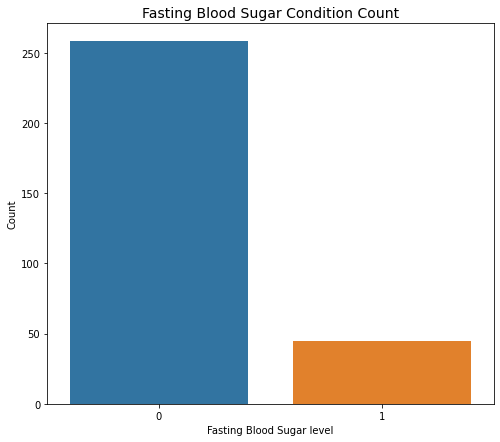

In [49]:
plt.figure(figsize=(8, 7))
sns.countplot(df['fbs'])
plt.title("Fasting Blood Sugar Condition Count", fontdict={'fontsize': 14})
plt.xlabel("Fasting Blood Sugar level")
plt.ylabel("Count")

#### Here the people having normal fasting blood sugar level is high is number than people having High fasting blood sugar level.

### Maximum Heart Rate Achieved
Maximum heart rate is measured in beats/minute

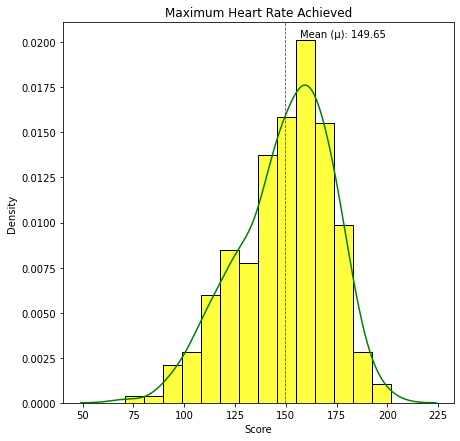

In [50]:
plt.figure(figsize=(7, 7))
plt.title(f"Maximum Heart Rate Achieved")
sns.histplot(df['thalachh'], stat='density', color='yellow')
sns.kdeplot(df['thalachh'], color='green')
plt.axvline(df['thalachh'].mean(), color='red', linestyle='--', linewidth=0.8)
min_ylim, max_ylim = plt.ylim()
plt.text(df['thalachh'].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df['thalachh'].mean()))
plt.xlabel("Score")
plt.ylabel("Density")
plt.show()

In [51]:
print_quantile_summary("thalachh")

Some Stats about Thalachh : Maximum Thalachh is: 202
Minimum Thalachh is: 71

25% of people were less than 133 Thalachh
50% of people were less than 153 Thalachh
75% of people were less than 166 Thalachh


### Target Variable Count
Count of people having chances of getting heart attack

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

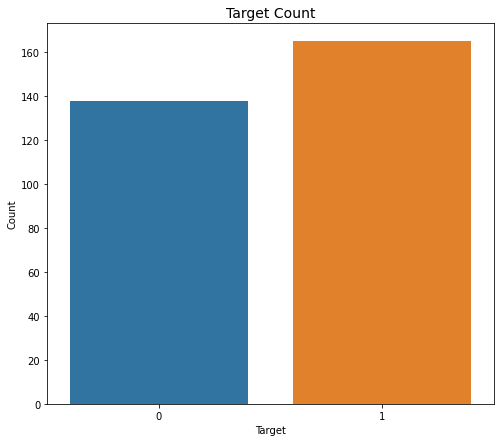

In [52]:
plt.figure(figsize=(8, 7))
sns.countplot(df['output'])
plt.title("Target Count", fontdict={'fontsize': 14})
plt.xlabel("Target")
plt.ylabel("Count")

#### Number of people having chances of heart attack is high in the dataset

## In-Depth Exploratory Data Analysis 📈

### Gender VS Resting Blood Pressure

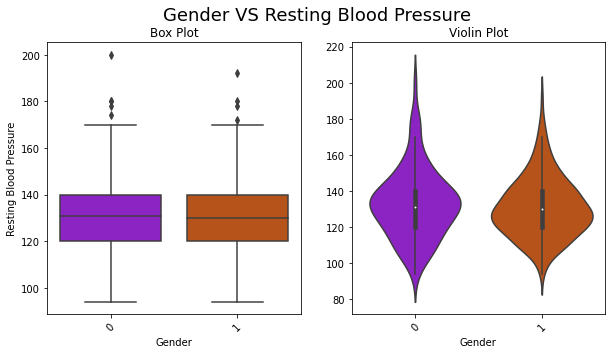

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.boxplot(x='sex', y='trtbps', data=df, ax=ax[0], palette='gnuplot')
ax[0].set_title("Box Plot")
ax[0].set_xlabel("Gender")
ax[0].set_ylabel("Resting Blood Pressure")
ax[0].tick_params(axis='x', rotation=45)

sns.violinplot(x='sex', y='trtbps', data=df, ax=ax[1], palette='gnuplot')
ax[1].set_title("Violin Plot")
ax[1].set_xlabel("Gender")
ax[1].set_ylabel("Resting Blood Pressure", color='w')
ax[1].tick_params(axis='x', rotation=45)

fig.suptitle("Gender VS Resting Blood Pressure", fontsize=18)

plt.show()

### Gender vs Cholestrol

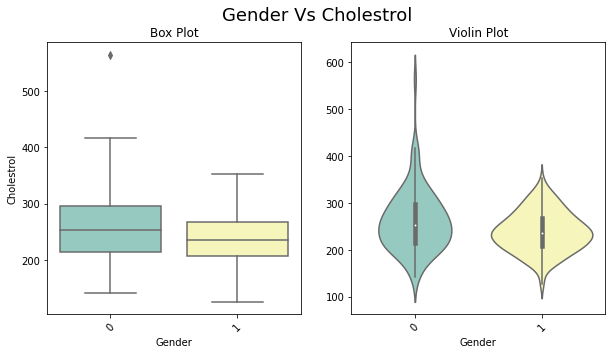

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.boxplot(x='sex', y='chol', data=df, ax=ax[0], palette='Set3')
ax[0].set_title("Box Plot")
ax[0].set_xlabel("Gender")
ax[0].set_ylabel("Cholestrol")
ax[0].tick_params(axis='x', rotation=45)

sns.violinplot(x='sex', y='chol', data=df, ax=ax[1], palette='Set3')
ax[1].set_title("Violin Plot")
ax[1].set_xlabel("Gender")
ax[1].set_ylabel("Cholestrol", color='w')
ax[1].tick_params(axis='x', rotation=45)

fig.suptitle("Gender Vs Cholestrol", fontsize=18)

plt.show()

### Chest Pain Type VS Gender

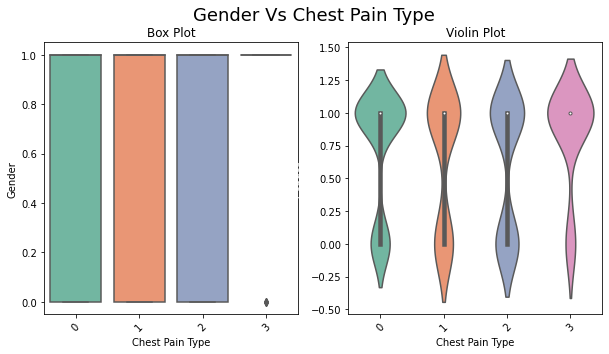

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.boxplot(x='cp', y='sex', data=df, ax=ax[0], palette='Set2')
ax[0].set_title("Box Plot")
ax[0].set_xlabel("Chest Pain Type")
ax[0].set_ylabel("Gender")
ax[0].tick_params(axis='x', rotation=45)

sns.violinplot(x='cp', y='sex', data=df, ax=ax[1], palette='Set2')
ax[1].set_title("Violin Plot")
ax[1].set_xlabel("Chest Pain Type")
ax[1].set_ylabel("Gender", color='w')
ax[1].tick_params(axis='x', rotation=45)

fig.suptitle("Gender Vs Chest Pain Type", fontsize=18)

plt.show()

### Chest Pain Type vs Resting Blood Pressure

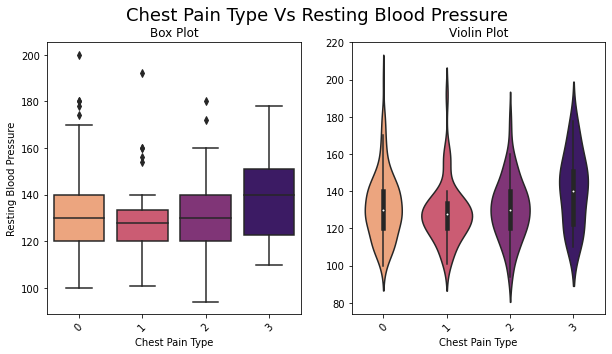

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.boxplot(x='cp', y='trtbps', data=df, ax=ax[0], palette='magma_r')
ax[0].set_title("Box Plot")
ax[0].set_xlabel("Chest Pain Type")
ax[0].set_ylabel("Resting Blood Pressure")
ax[0].tick_params(axis='x', rotation=45)

sns.violinplot(x='cp', y='trtbps', data=df, ax=ax[1], palette='magma_r')
ax[1].set_title("Violin Plot")
ax[1].set_xlabel("Chest Pain Type")
ax[1].set_ylabel("Resting Blood Pressure", color='w')
ax[1].tick_params(axis='x', rotation=45)

fig.suptitle("Chest Pain Type Vs Resting Blood Pressure", fontsize=18)

plt.show()

### 

### Chest Pain Vs Cholestrol

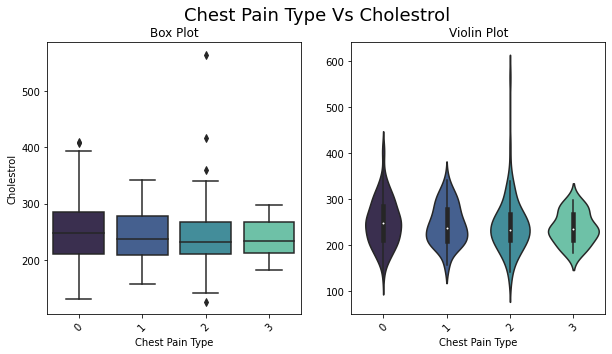

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.boxplot(x='cp', y='chol', data=df, ax=ax[0], palette='mako')
ax[0].set_title("Box Plot")
ax[0].set_xlabel("Chest Pain Type")
ax[0].set_ylabel("Cholestrol")
ax[0].tick_params(axis='x', rotation=45)

sns.violinplot(x='cp', y='chol', data=df, ax=ax[1], palette='mako')
ax[1].set_title("Violin Plot")
ax[1].set_xlabel("Chest Pain Type")
ax[1].set_ylabel("Cholestrol", color='w')
ax[1].tick_params(axis='x', rotation=45)

fig.suptitle("Chest Pain Type Vs Cholestrol", fontsize=18)

plt.show()

### Chances of getting Heartattack vs Maximum Blood Pressure

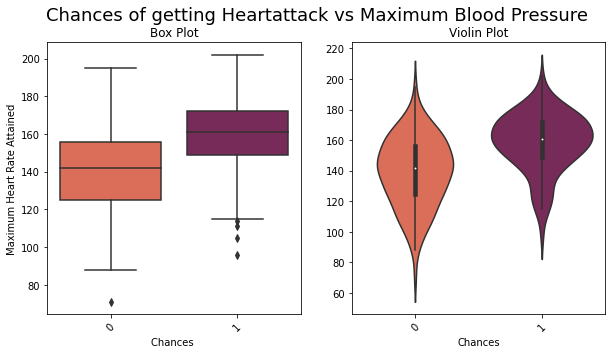

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.boxplot(x='output', y='thalachh', data=df, ax=ax[0], palette='rocket_r')
ax[0].set_title("Box Plot")
ax[0].set_xlabel("Chances ")
ax[0].set_ylabel("Maximum Heart Rate Attained")
ax[0].tick_params(axis='x', rotation=45)

sns.violinplot(x='output', y='thalachh', data=df, ax=ax[1], palette='rocket_r')
ax[1].set_title("Violin Plot")
ax[1].set_xlabel("Chances")
ax[1].set_ylabel("Maximum Heart Rate Attained", color='w')
ax[1].tick_params(axis='x', rotation=45)

fig.suptitle("Chances of getting Heartattack vs Maximum Blood Pressure", fontsize=18)

plt.show()

### Chances of getting Heartattack vs Cholestrol

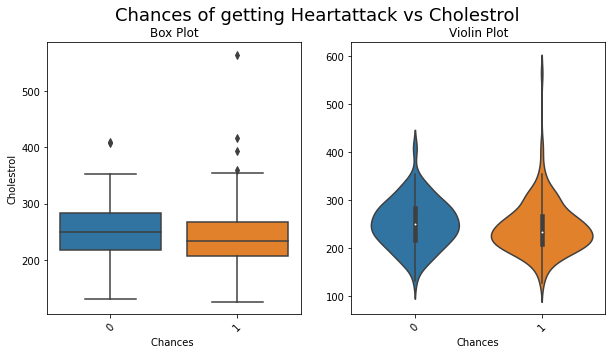

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.boxplot(x='output', y='chol', data=df, ax=ax[0], palette='tab10')
ax[0].set_title("Box Plot")
ax[0].set_xlabel("Chances ")
ax[0].set_ylabel("Cholestrol")
ax[0].tick_params(axis='x', rotation=45)

sns.violinplot(x='output', y='chol', data=df, ax=ax[1], palette='tab10')
ax[1].set_title("Violin Plot")
ax[1].set_xlabel("Chances")
ax[1].set_ylabel("Cholestrol", color='w')
ax[1].tick_params(axis='x', rotation=45)

fig.suptitle("Chances of getting Heartattack vs Cholestrol", fontsize=18)

plt.show()

### Adding new dataset with one feature called "Saturation"

In [60]:
meta=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv")
print(meta.columns.tolist)


<bound method IndexOpsMixin.tolist of Index(['98.6'], dtype='object')>


In [61]:
class_feature=meta['98.6']
append=df.join(class_feature)
#print(append.shape)
print(append.columns.tolist)
df.columns

<bound method IndexOpsMixin.tolist of Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')>


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

### Heat Map

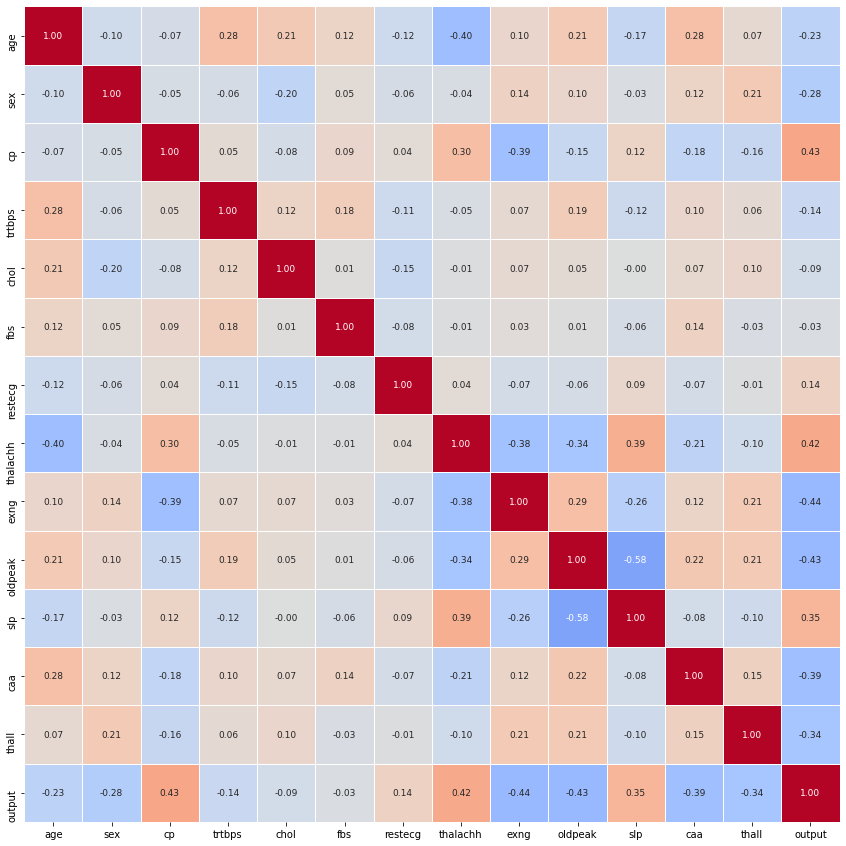

In [62]:
def heatmap(df):
    
    fig, ax = plt.subplots(figsize = (15, 15))
    
    sns.heatmap(df.corr(), cmap = "coolwarm", annot = True, fmt = ".2f", annot_kws = {"fontsize": 9},
                vmin = -1, vmax = 1, square = True, linewidths = 0.8, cbar = False)
    
heatmap(df)

## Hypothesis Testing 🧿

### Shapiro-Wilk Test
Shapiro-Wilk Tests whether a data sample has a Gaussian distribution.
Assumptions
- Observations in each sample are independent and identically distributed (iid).

Interpretation
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.
Here, testing will be done on `Resting Blood Pressure`, `Cholestrol`,`Maximum Heart Rate Attained`, and `Fasting Blood Sugar Level`,and then store the results in a dataframe.

In [63]:
# Make a dataframe for our test
tests = pd.DataFrame()

# Get the values from old
resting_blood_pressure = df['trtbps'].values
cholestrol = df['chol'].values
maximum_heart_rate = df['thalachh'].values
fasting_blood_sugar_level = df['fbs'].values

rlist, clist, mlist, flist = [], [], [], []

# Make a list of all values and iteratively calculate the shapiro value
values = [('resting_blood_pressure', resting_blood_pressure, rlist), ('cholestrol', cholestrol, clist), ('maximum_heart_rate', maximum_heart_rate, mlist), ('fasting_blood_sugar_level', fasting_blood_sugar_level, flist)]
for value in values:
    _, prob = shapiro(value[1])
    if prob > 0.05:
        value[2].append("H0")
    else:
        value[2].append("H1")

    tests[f'{value[0]}_shapiro'] = value[2]

tests.head()

,resting_blood_pressure_shapiro,cholestrol_shapiro,maximum_heart_rate_shapiro,fasting_blood_sugar_level_shapiro
0,H1,H1,H1,H1


### D’Agostino’s K^2 Test
D’Agostino’s K^2 Tests whether a data sample has a Gaussian distribution.

Assumptions

- Observations in each sample are independent and identically distributed.

Interpretation
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

In [64]:
# Get the value from old dataframe
resting_blood_pressure = df['trtbps'].values
cholestrol = df['chol'].values
maximum_heart_rate = df['thalachh'].values
fasting_blood_sugar_level = df['fbs'].values

rlist, clist, mlist, flist = [], [], [], []

# Make a list of all values and iteratively calculate the shapiro value
values = [('resting_blood_pressure', resting_blood_pressure, rlist), ('cholestrol', cholestrol, clist), ('maximum_heart_rate', maximum_heart_rate, mlist), ('fasting_blood_sugar_level', fasting_blood_sugar_level, flist)]

# Make a list of all scores and iteratively calculate the d'augstino value
for value in values:
    _, prob = normaltest(value[1])
    if prob > 0.05:
        value[2].append("H0")
    else:
        value[2].append("H1")

    tests[f"{value[0]}_d'augstino"] = value[2]

tests.head()

,resting_blood_pressure_shapiro,cholestrol_shapiro,maximum_heart_rate_shapiro,fasting_blood_sugar_level_shapiro,resting_blood_pressure_d'augstino,cholestrol_d'augstino,maximum_heart_rate_d'augstino,fasting_blood_sugar_level_d'augstino
0,H1,H1,H1,H1,H1,H1,H1,H1


<center style="color:green"> MORE WORK TO BE DONE IN FUTURE !! ALSO PLEASE COMMENT YOUR SUGGESTIONS, THANK YOU! </center>